   # Netflix Data: Cleaning,Analysis and Visualization
   
      Below are contents of the Project :
        
         1.Description
         2.Importing Python Packages
         3.Describing Dataset
         4.Data Preprocessing
         5.Analysis & Data Visualization
   # Description :   
         This project involves loading, cleaning, analyzing, and visualizing data from a Netflix
         dataset. We'll use Python libraries like Pandas, Matplotlib, and Seaborn to work
         through the project. The goal is to explore the dataset, derive insights, and prepare
         for potential machine learning tasks.





# Importing Python Packages/Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Packages imported successfully')

Packages imported successfully


In [2]:
# Read the CSV file, specifying that 'date_added' column should be parsed as dates
df = pd.read_csv('F:/Data science/netflix1.csv', parse_dates=['date_added'])

# Display the first few rows of the DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Describing,Preprocessing and Cleaning of Dataset :


In [3]:
# Get the dimensions of the DataFrame
df.shape

(8790, 10)

In [4]:
# Rename the column "listed_in" to "category"
df.rename(columns={"listed_in":"category"},inplace=True)

# Display the first 2 rows of the DataFrame to verify the change
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [5]:
# Print a summary of the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [6]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Print the missing values
print(missing_values)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
category        0
dtype: int64


In [7]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print the duplicate rows
print(duplicates)

# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the number of duplicate rows
print('Number of duplicate rows:', num_duplicates) 


0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool
Number of duplicate rows: 0


# Analysis & Data Visualization

In [9]:
# Count the occurrences of each unique value in the 'type' column
content_counts = df['type'].value_counts()

# Print the content counts
print(content_counts)

Movie      6126
TV Show    2664
Name: type, dtype: int64


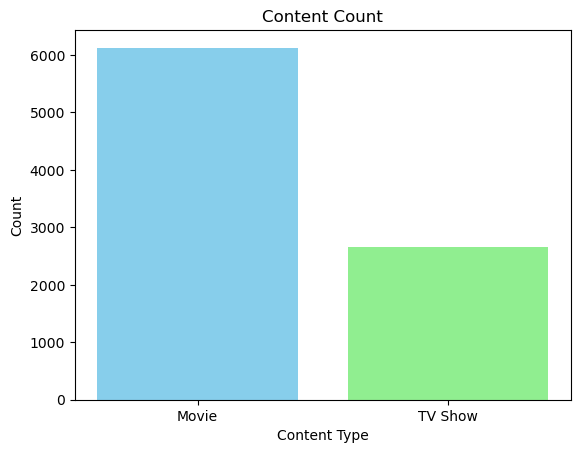

In [10]:
# Extract categories (unique content types) and counts from the value counts
categories = content_counts.index
counts = content_counts.values

# Define colors for the bars (optional, customize as desired)
colors = ['skyblue', 'lightgreen']

# Create a bar chart to visualize the content distribution
plt.bar(categories, counts, color=colors)

# Add informative labels and title for better understanding
plt.title('Content Count')
plt.xlabel('Content Type')
plt.ylabel('Count')

# Display the generated bar chart
plt.show()


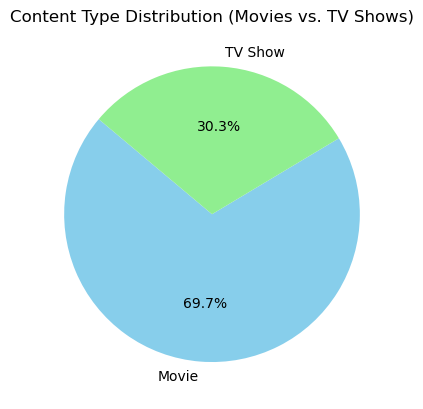

In [11]:
# Extract labels (unique content types) and sizes (corresponding counts)
labels = content_counts.index
sizes = content_counts.values

# Define colors for the pie chart slices (optional, customize as needed)
colors = ['skyblue', 'lightgreen']

# Create a pie chart with labels, colors, and percentage formatting
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a descriptive title for the chart
plt.title('Content Type Distribution (Movies vs. TV Shows)')

# Display the generated pie chart
plt.show()




In [12]:
# Count the occurrences of each unique director in the 'director' column
director_counts = df['director'].value_counts()

# Print the director counts
print(director_counts)

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64


In [13]:
# Filter out rows where the 'director' is "Not Given"
director_given = df[df['director'] != 'Not Given']

# Count the occurrences of each unique director in the filtered DataFrame
director_counts = director_given['director'].value_counts().head(15)

# Print the top 10 director counts
print(director_counts)

Rajiv Chilaka                   20
Raúl Campos, Jan Suter          18
Alastair Fothergill             18
Marcus Raboy                    16
Suhas Kadav                     16
Jay Karas                       14
Cathy Garcia-Molina             13
Youssef Chahine                 12
Jay Chapman                     12
Martin Scorsese                 12
Steven Spielberg                11
Mark Thornton, Todd Kauffman    10
Don Michael Paul                10
David Dhawan                     9
Fernando Ayllón                  8
Name: director, dtype: int64


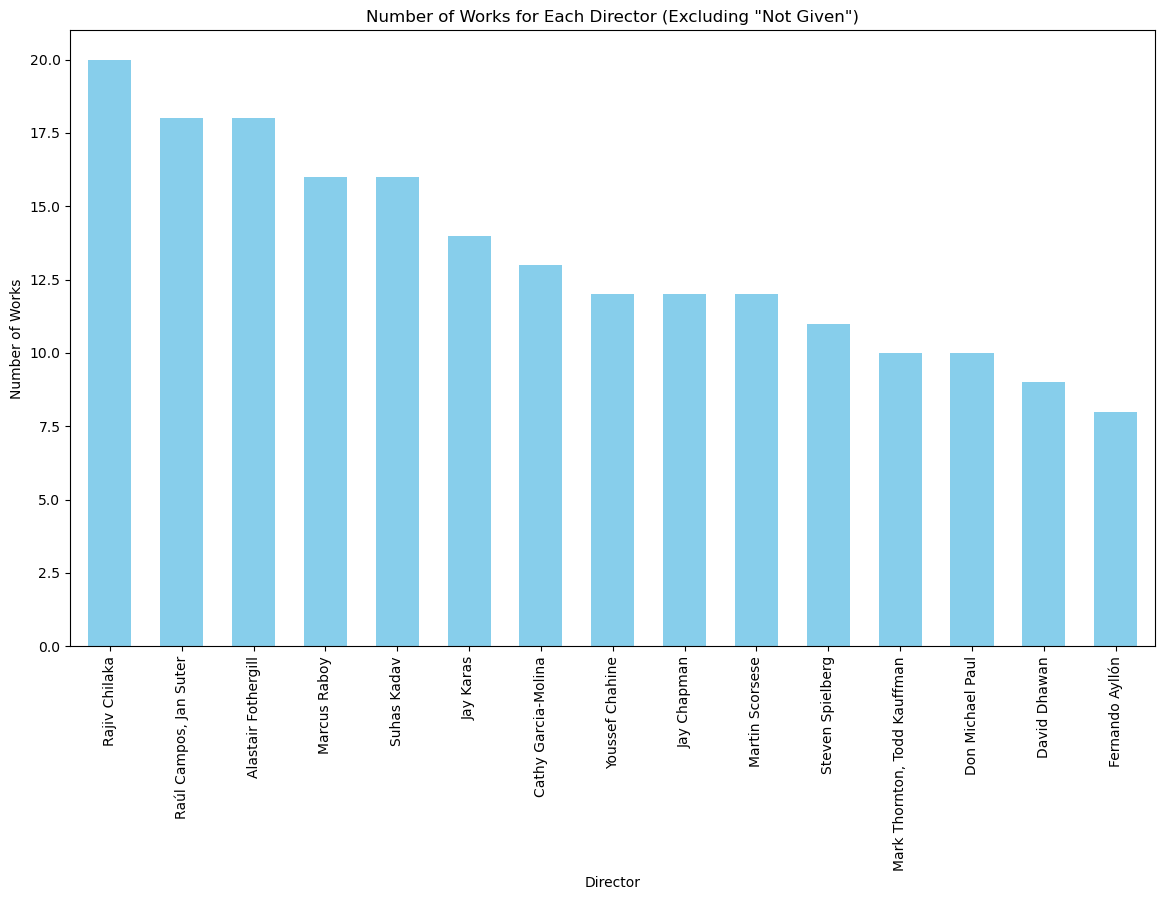

In [61]:
# Configure the figure size (optional, adjust as needed)
plt.figure(figsize=(14, 8))

# Create a bar chart with customizations
director_counts.plot(kind='bar', color='skyblue', width=0.6)

# Add informative labels and title
plt.title('Number of Works for Each Director (Excluding "Not Given")')
plt.xlabel('Director')
plt.ylabel('Number of Works')

# Rotate x-axis labels for readability (optional, adjust angle as needed)
plt.xticks(rotation=90)

# Display the generated bar chart
plt.show()

In [15]:
# Count the occurrences of each unique value in the 'rating' column
rating_counts = df['rating'].value_counts()

# Print the rating counts
print(rating_counts)

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


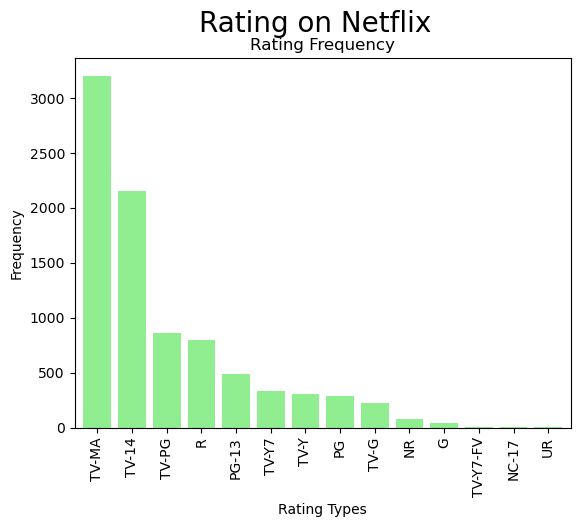

In [16]:
# Create a bar chart to visualize rating distribution
rating_counts.plot(kind='bar', color='lightgreen', width=0.8)

# Add informative labels and title
plt.title('Rating Frequency')
plt.xlabel("Rating Types")
plt.ylabel("Frequency")

# Rotate x-axis labels for readability (adjust angle as needed)
plt.xticks(rotation=90)

# Add a main title above the plot (optional)
plt.suptitle('Rating on Netflix', fontsize=20)

# Display the generated bar chart
plt.show()

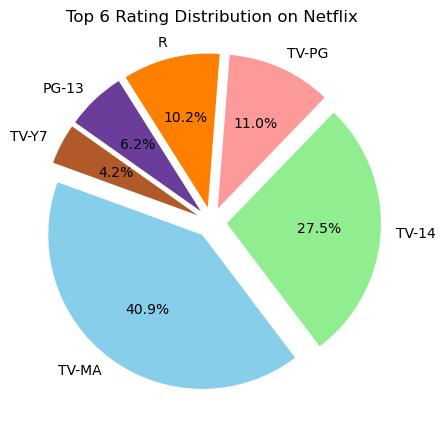

In [17]:
# Extract the top 6 rating counts and corresponding labels
top_ratings = rating_counts.head(6)
sizes = top_ratings.values
labels = top_ratings.index

# Define colors for the pie chart slices
colors=plt.cm.Paired(np.linspace(0,1,len(sizes)))
custom_colors = ['skyblue', 'lightgreen'] + list(colors[2:])

# Create a pie chart with customizations
plt.figure(figsize=(5, 5))  # Adjust figure size as needed
explode = [0.1] * len(top_ratings)  # Create an explosion effect for the top slice
plt.pie(sizes, labels=labels, colors=custom_colors, autopct='%1.1f%%', startangle=160, explode=explode)

# Add a descriptive title
plt.title('Top 6 Rating Distribution on Netflix')

# Display the pie chart
plt.show()


In [42]:
# Count the occurrences of each unique country in the 'country' column
country_counts = df['country'].value_counts()
# Convert the Series to a DataFrame for easier manipulation
country_df = country_counts.reset_index()

# Rename the columns of the DataFrame
country_df.columns = ['country', 'count']

In [43]:
# Sort the DataFrame by the 'count' column in descending order and select the top 30 rows
country_df = country_df.sort_values(by='count', ascending=False).head(30)

# Print the top 30 countries and their counts
print(country_df)

           country  count
0    United States   3240
1            India   1057
2   United Kingdom    638
3         Pakistan    421
4        Not Given    287
5           Canada    271
6            Japan    259
7      South Korea    214
8           France    213
9            Spain    182
10          Mexico    138
11           Egypt    123
12       Australia    114
13          Turkey    112
14         Nigeria    105
15         Germany    104
16           China    100
17          Brazil     88
18          Taiwan     86
19       Indonesia     86
20     Philippines     83
21       Hong Kong     79
22       Argentina     76
23           Italy     66
24        Thailand     66
25        Colombia     42
26    South Africa     42
27         Denmark     30
28          Poland     30
29     Netherlands     28


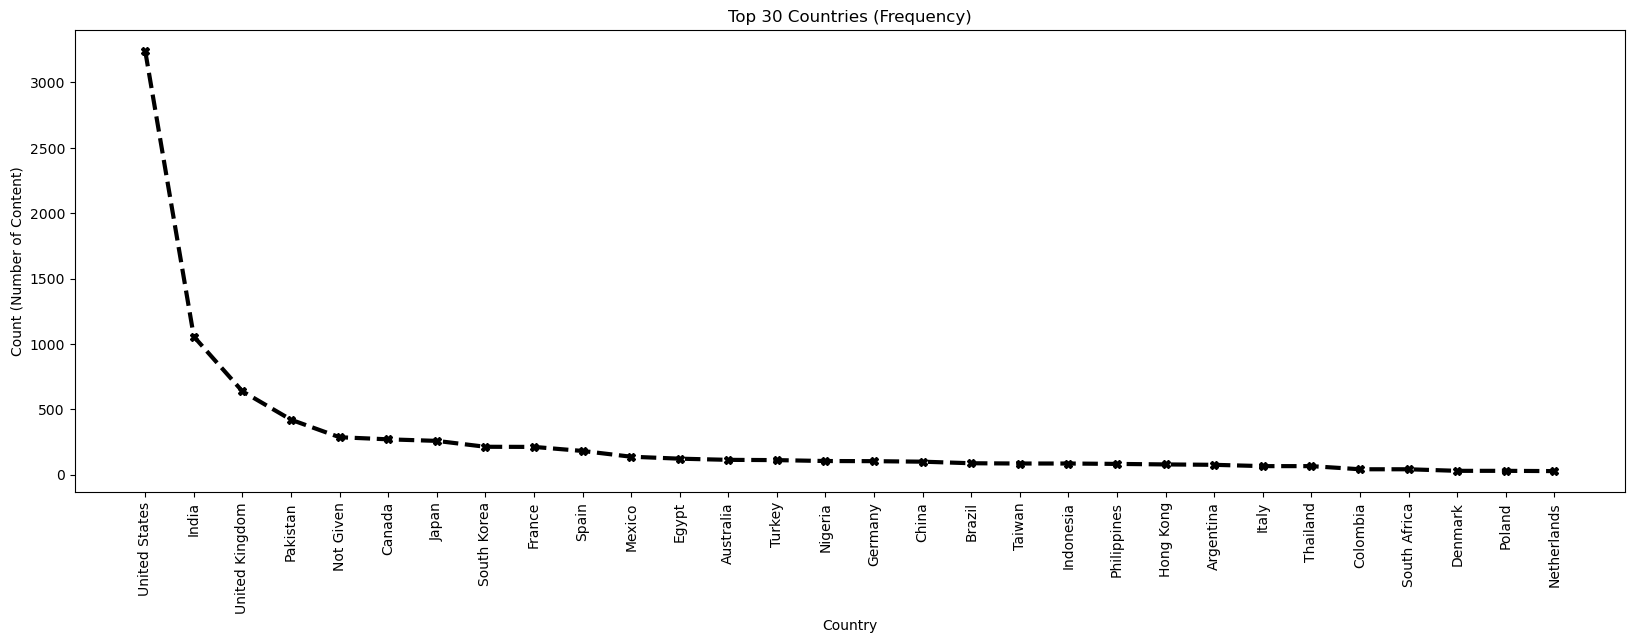

In [44]:
# Configure the figure size (optional, adjust as needed)
plt.figure(figsize=(20, 6))

# Create a line chart with customizations
plt.plot(country_df['country'], country_df['count'], marker='X', color='black', linestyle='--', linewidth=3)

# Add informative labels and title
plt.title('Top 30 Countries (Frequency)')
plt.xlabel("Country")
plt.ylabel("Count (Number of Content)")

# Rotate x-axis labels for readability (adjust angle as needed)
plt.xticks(rotation=90)

# Display the generated line chart
plt.show()

In [54]:
# Filter for movies only

popular_movies=df[df['type']=='Movie'].groupby("category").size().sort_values(ascending=False)[:7]
popular_movies

category
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
dtype: int64

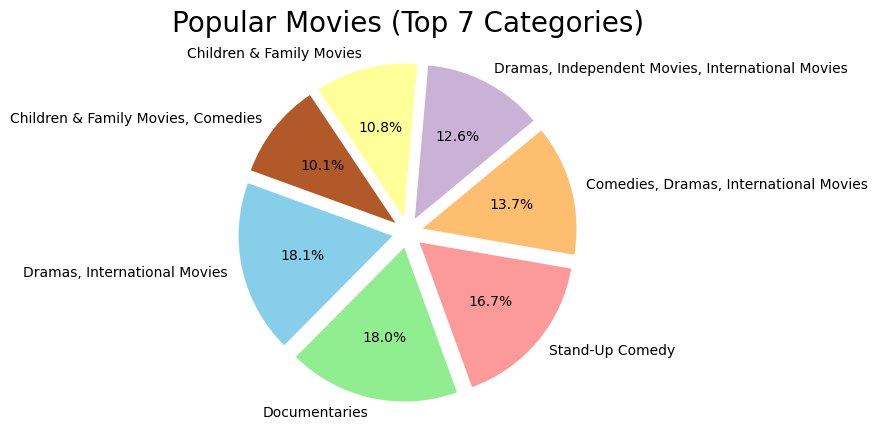

In [51]:
# Extract category counts and labels for the top 7 movies
sizes = popular_movies.values  # Movie category counts (top 7)
labels = popular_movies.index  # Movie category labels (top 7)

# Define colors for the pie chart slices
colors=plt.cm.Paired(np.linspace(0,1,len(sizes)))
custom_colors = ['skyblue', 'lightgreen'] + list(colors[2:]) # You can customize these colors

# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(5, 5))

# Create a list to slightly separate the top slice for emphasis
explode = [0.1] * len(popular_movies)

# Create the pie chart
plt.pie(sizes, labels=labels, colors=custom_colors, autopct='%1.1f%%', startangle=160, explode=explode)

# Add a title with a larger font size
plt.title('Popular Movies (Top 7 Categories)', size=20)

# Display the generated pie chart
plt.show()

In [23]:
# Filter for TV shows only
popular_series = df[df['type'] == 'TV Show'].groupby("category").size().sort_values(ascending=False)[:7]

# Print the popular TV series
print(popular_series)

category
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
dtype: int64


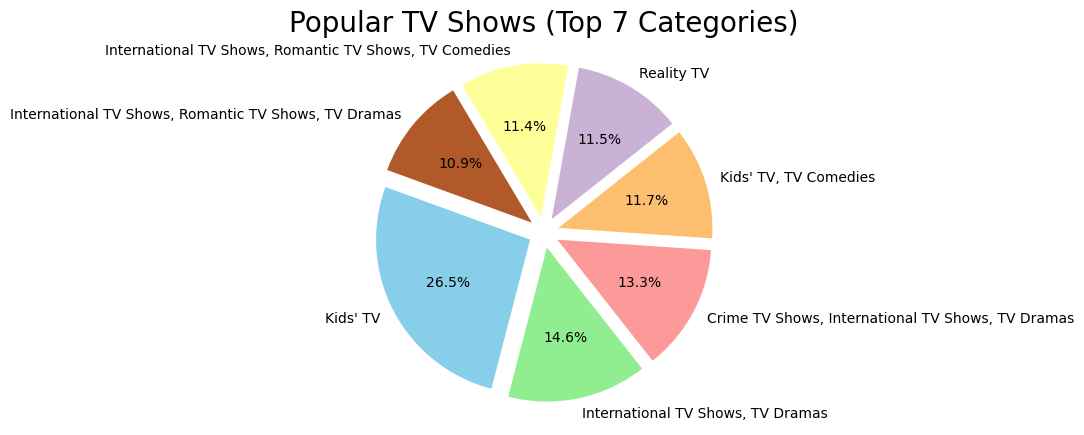

In [52]:
# Extract category counts and labels for the top 7 TV shows
sizes = popular_series.values  # TV show category counts (top 7)
labels = popular_series.index  # TV show category labels (top 7)

# Define colors for the pie chart slices
colors=plt.cm.Paired(np.linspace(0,1,len(sizes)))
custom_colors = ['skyblue', 'lightgreen'] + list(colors[2:]) # You can customize these colors

# Set the figure size (optional, adjust as needed)
plt.figure(figsize=(5, 5))

# Create a list to slightly separate the top slice for emphasis
explode = [0.1] * len(popular_series)

# Create the pie chart
plt.pie(sizes, labels=labels, colors=custom_colors, autopct='%1.1f%%', startangle=160, explode=explode)

# Add a title with a larger font size
plt.title('Popular TV Shows (Top 7 Categories)', size=20)

# Display the generated pie chart
plt.show()